In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [5]:
calorie = pd.read_csv('Dataset/calories.csv')

In [6]:
calorie.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [7]:
excercise_data = pd.read_csv('Dataset/exercise.csv')

In [8]:
excercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [9]:
excercise_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

Combining the two dataframe

In [10]:
calorie_data = pd.concat([excercise_data, calorie['Calories']], axis=1)

In [11]:
calorie_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [12]:
calorie_data.shape

(15000, 9)

Data visualisation

c:\Users\MOHIT RANJAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

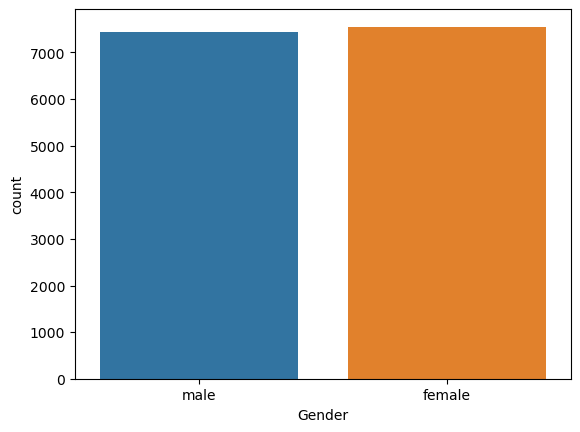

In [13]:
#plotting the gender column in count plot
sns.countplot(calorie_data['Gender'])

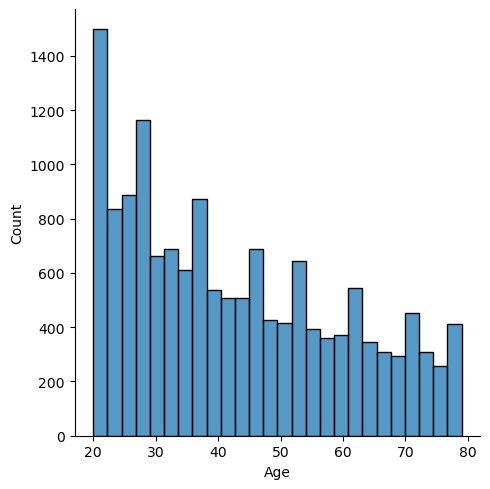

In [14]:
#finding the distribution of age column
sns.displot(calorie_data['Age'])

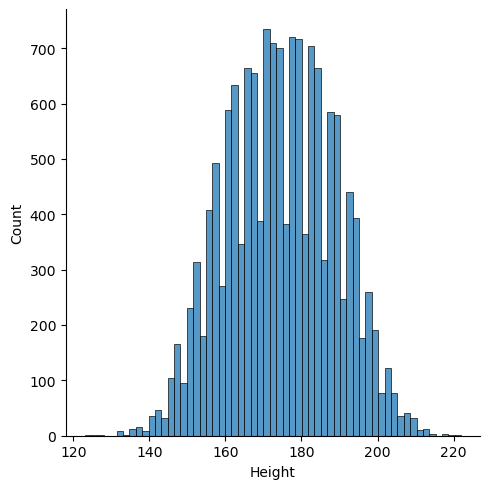

In [15]:
#finding the distribution of height column
sns.displot(calorie_data['Height'])

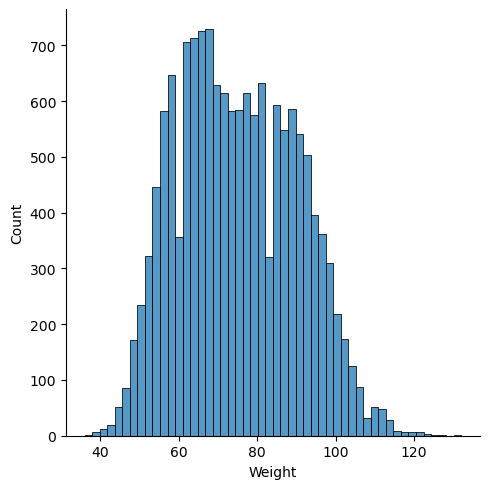

In [86]:
sns.displot(calorie_data['Weight'])

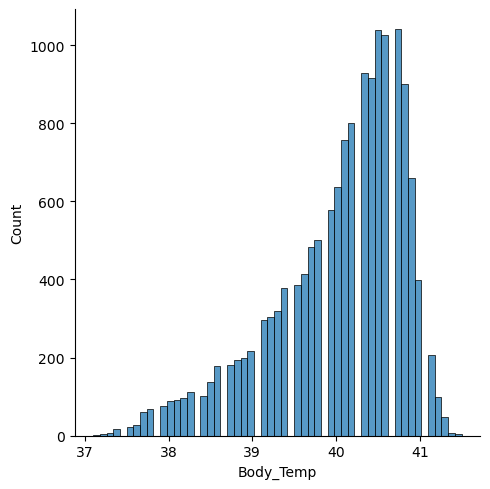

In [36]:
sns.displot(calorie_data['Body_Temp'])

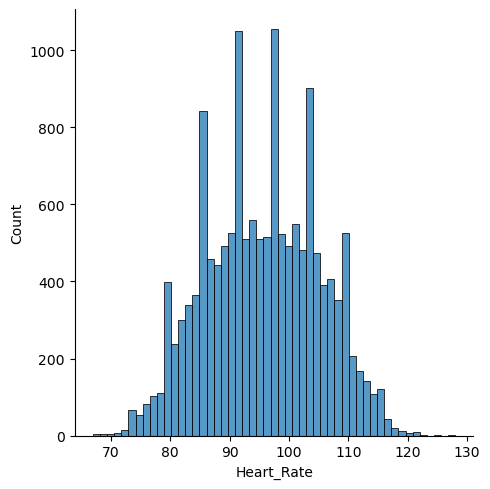

In [37]:
sns.displot(calorie_data['Heart_Rate'])

In [34]:
calorie_data.replace({'Gender':{'male':0, 'female':1}},inplace=True)

In [35]:
calorie_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [19]:
X = calorie_data.drop(columns=['User_ID','Calories'],axis=1)
Y = calorie_data['Calories']

In [20]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [21]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting the data into train and test data

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [23]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training

In [24]:
model = XGBRegressor()

In [25]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluation

In [26]:
#prediction on test data
test_data_prediction = model.predict(X_test)

In [27]:
print(test_data_prediction)

[127.823784 226.00154   38.66253  ... 144.3636    22.767195  89.87375 ]


In [28]:
mae = metrics.mean_absolute_error(Y_test,test_data_prediction)

In [29]:
print("Mean absolute error: ",mae)

Mean absolute error:  1.4807048829992613


In [30]:
model.score(X_test,Y_test)

0.9988455491362879

In [38]:
print(X_train.head())

      Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
1154       1   38   169.0    67.0       3.0        85.0       38.5
9804       0   30   194.0    96.0       9.0        91.0       39.6
7919       1   78   182.0    79.0       7.0        84.0       39.4
4854       0   50   171.0    77.0      29.0       111.0       40.8
5947       1   32   172.0    66.0      29.0       105.0       40.8


In [57]:
new_data = np.array([[1, 20, 175.0, 75.0, 35.0, 105.0, 38.8]])

In [58]:
new_data_prediction = model.predict(new_data)

In [59]:
print(new_data_prediction)

[169.18224]
